In [1]:
from typing import  TypedDict
from langgraph.graph import StateGraph, START, END

In [26]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber: int
    
    

In [33]:
def adder(state: AgentState) -> AgentState:
    """Node that adds two numbers."""
    state['finalNumber'] += state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """Node that subtracts two numbers."""
    state['finalNumber'] += state['number1'] - state['number2']
    return state

def decision_node1(state: AgentState) -> AgentState:
    """Decision node that chooses the next node of the graph."""
    if state['operation1'] == '+':
        return 'add_operation1'
    else:
        return 'subtract_operation1'
    
def decision_node2(state: AgentState) -> AgentState:
    """Decision node that chooses the next node of the graph."""
    if state['operation2'] == '+':
        return 'add_operation2'
    else:
        return 'subtract_operation2'

In [34]:
graph = StateGraph(AgentState)
graph.add_node('add_node1', adder)
graph.add_node('add_node2', adder)
graph.add_node('subtract_node1', subtractor)
graph.add_node('subtract_node2', subtractor)
graph.add_node('router1', lambda state: state)
graph.add_node('router2', lambda state: state)

graph.add_edge(START, 'router1')
graph.add_conditional_edges('router1',decision_node1, {
    'add_operation1': "add_node1",
    'subtract_operation1': "subtract_node1"
})
graph.add_edge('add_node1', 'router2')
graph.add_edge('subtract_node1', 'router2')
graph.add_conditional_edges('router2',decision_node2, {
    'add_operation2': "add_node2",
    'subtract_operation2': "subtract_node2"
})
graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)

app = graph.compile()

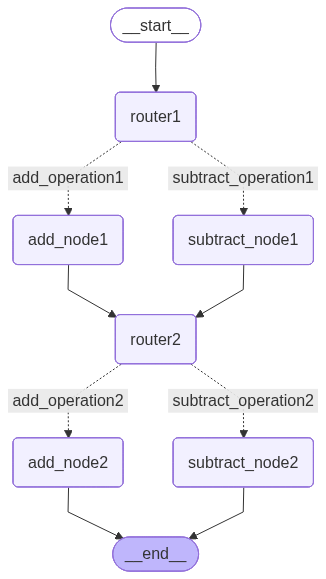

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
initial_state: AgentState = {"number1": 10, "operation1": "+", "number2": 5, "number3":15, "operation2": "+", "number4":0, "finalNumber":0}
final_state = app.invoke(initial_state)
print(final_state['finalNumber'])  # Output: 15


30


In [19]:

initial_state: AgentState = {"number1": 10, "operation": "-", "number2": 5}
final_state = app.invoke(initial_state)
print(final_state['finalNumber'])  # Output: 5

5
